In [1]:
import os
import shutil

In [2]:
# Save images with only their nsd number in new folder

In [3]:
def copy_images_with_new_names(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        if filename.endswith(".png"):
            _, name_part = filename.split("_nsd-")
            new_filename = f"{name_part.split('.')[0]}.png"
            source_path = os.path.join(source_folder, filename)
            destination_path = os.path.join(destination_folder, new_filename)
            shutil.copy(source_path, destination_path)


source_folder_path = "algonauts_data/subj01/updated/img"
destination_folder_path = "algonauts_data/shared_img"

copy_images_with_new_names(source_folder_path, destination_folder_path)

FileNotFoundError: [Errno 2] No such file or directory: 'algonauts_data/shared_img/29568.png'

In [ ]:
# Load in all nsd numbers into a list

In [6]:
def get_image_names(folder_path):
    image_names = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
            image_name = filename[:-4]  # Removing the last 4 characters (".png") to get the image name
            image_names.append(image_name)
    return image_names

folder_path = "algonauts_data/shared_img"

image_names_list = get_image_names(folder_path)
len(image_names_list)

872

In [22]:
image_names_list[:5]

['28319', '28325', '36682', '04156', '48374']

In [24]:
shared_nsd = [int(i) for i in image_names_list]
shared_nsd[:5]

[28319, 28325, 36682, 4156, 48374]

In [7]:
# Find the COCO ID by mapping with csv file

In [8]:
import pandas as pd

In [15]:
df = pd.read_csv("algonauts_data/nsd_stim_info_merged.txt", delimiter=",")

In [16]:
df.head(5)

,nsdId,cocoId,cocoSplit,cropBox,loss,nsdId.1,flagged,BOLD5000,shared1000,subject1,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
1,1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
3,3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,...,0,13720,22861,23023,0,0,0,0,0,0


In [17]:
cols_to_keep = ['nsdId', 'cocoId', 'cocoSplit']

In [18]:
df = df.drop(columns=[col for col in df.columns if col not in cols_to_keep])
df.head(5)

,nsdId,cocoId,cocoSplit
0,0,532481,val2017
1,1,245764,val2017
2,2,385029,val2017
3,3,311303,val2017
4,4,393226,val2017


In [25]:
filtered_df = df[df['nsdId'].isin(shared_nsd)]
filtered_df.head(5)

,nsdId,cocoId,cocoSplit
2950,2950,262145,train2017
2990,2990,262239,train2017
3049,3049,262414,train2017
3077,3077,524646,train2017
3146,3146,262690,train2017


In [26]:
len(filtered_df)

872

In [45]:
shared_nsd_dict = {row['nsdId']: (row['cocoId']) for _, row in filtered_df.iterrows()}
shared_nsd_dict[3146]

262690

In [31]:
filtered_df['cocoSplit'].unique() # can ommit the cocoSplit as they are all from train2017

array(['train2017'], dtype=object)

In [4]:
import sys
custom_path = '/Users/sebastian/University/Bachelor/Thesis/ba-thesis/algonauts_data/cocoapi/PythonAPI'
sys.path.append(custom_path)

# Now you can import the module from the specified path
from pycocotools import coco

ModuleNotFoundError: No module named 'pycocotools'

In [ ]:
dataDir='../coco'
dataType='train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [39]:
annFile = '/Users/sebastian/University/Bachelor/Thesis/ba-thesis/algonauts_data/cocoapi/coco/annotations/captions_train2017.json'
coco_caps=coco.COCO(annFile)

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!


In [42]:
coco = coco.COCO(annotation_file='/Users/sebastian/University/Bachelor/Thesis/ba-thesis/algonauts_data/cocoapi/coco/annotations-2/stuff_train2017.json')  # Replace with the appropriate annotation file path

loading annotations into memory...
Done (t=13.33s)
creating index...
index created!


People shopping in an open market for vegetables.
An open market full of people and piles of vegetables.
People are shopping at an open air produce market.
Large piles of carrots and potatoes at a crowded outdoor market.
People shop for vegetables like carrots and potatoes at an open air market.


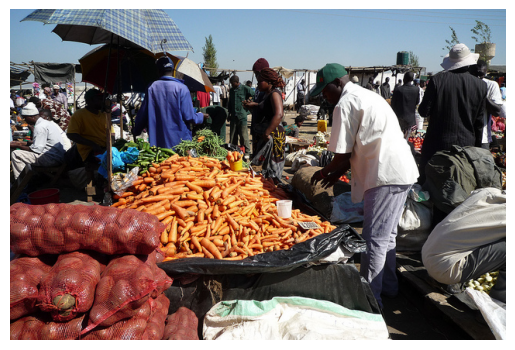

In [53]:
annIds = coco_caps.getAnnIds(imgIds=shared_nsd_dict[2950])
image_info = coco.loadImgs(shared_nsd_dict[2950])[0]
I = io.imread(image_info['coco_url'])
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I)
plt.axis('off') 
plt.show()

In [57]:
d2 = {}
for k, v in shared_nsd_dict.items():
    annIds = coco_caps.getAnnIds(imgIds=v)
    anns = coco_caps.loadAnns(annIds)
    d2[k] = anns[0]['caption']

In [62]:
d2[3386]

'A man in swim shorts is riding a surf board.'

In [63]:
output_file = 'algonauts_data/output_file.txt'

# Write the dictionary to the text file
with open(output_file, 'w') as file:
    for key, value in d2.items():
        formatted_key = f'{key:05}'  # Pad the key with leading zeros to make it 5 digits long
        file.write(f'{formatted_key}: {value}\n')